In [90]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from operator import itemgetter
from networkx.algorithms import community
from networkx.drawing.nx_agraph import graphviz_layout

In [91]:
df = pd.read_csv('data/hash_edges_45.csv')

In [92]:
# drops first row, which will be inserted as 'data' below
df.drop(df.index[0], inplace=True)

In [93]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [94]:
#row.values[0] = string
#row.values[1] = int
# splits up string into two separate columns (nodes, representing edges)

data = [['maga', 'stopthesteal', 1.0]]
edges_df = pd.DataFrame(data, columns = ['edge1', 'edge2', 'weight'])

for index, row in df.iterrows():
    weight = row.values[1] # holds weight as int for placement
    tup = row.values[0]
    tup = tup.replace("(", "")
    tup = tup.replace(")", "")
    tup = tup.replace("'", "")
    tup = tup.replace(",", "")
    tup = tup.split(' ')
    temp_data = [[tup[0], tup[1], weight]]
    temp_edges_df = pd.DataFrame(temp_data, columns = ['edge1', 'edge2', 'weight'])
    edges_df = edges_df.append(temp_edges_df, ignore_index=True)

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
G = nx.MultiGraph()
G = nx.from_pandas_edgelist(edges_df, source='edge1', target='edge2', edge_attr=["weight"])

In [97]:
print(G.number_of_edges())
print(G.number_of_nodes())

130
78


In [98]:
# creates dict of nodes
nodes = dict(G.nodes())

In [99]:
# converts to multigraph, with self-loops and parallel edges
hashG = nx.MultiGraph(G)

In [100]:
deg = dict(nx.degree(hashG))

In [101]:
deg

{'maga': 16,
 'stopthesteal': 76,
 'trump': 11,
 'marchfortrump': 3,
 'fightfortrump': 6,
 'trumpwon': 6,
 'trump2020': 4,
 '世界をひっくり返そう': 2,
 'wethepeople': 8,
 'stopthecoup': 4,
 'fightback': 5,
 'kag': 2,
 'draintheswamp': 2,
 'electionfraud': 2,
 'jan6': 3,
 'americafirst': 2,
 'speakupgop': 1,
 'primaryrinos': 4,
 'gop': 6,
 'georgia': 1,
 'electionintegritymatters': 3,
 'traitortrump': 3,
 'trumplieseverytimehespeaks': 3,
 'trumpcorruption': 3,
 'capitol': 1,
 'voterfraud': 1,
 'washingtondc': 1,
 'electionfraud2020': 3,
 'usa': 2,
 'fightforamerica': 2,
 'holdtheline': 1,
 'saveamerica': 1,
 'kraken': 6,
 'america': 1,
 'antifa': 1,
 'election2020': 1,
 'patriotparty': 5,
 'savetrumplandslide': 4,
 'trumprally': 2,
 'january6th': 1,
 'stopthesteai2021': 1,
 'electionintegrity': 1,
 'patriots': 1,
 'dc': 1,
 'stopthesteal2020': 5,
 'maga2020': 2,
 'freedom': 4,
 'millionmoronmarch': 2,
 'wwg1wga': 1,
 'donotcertify': 1,
 'treason': 1,
 'trump2020tosaveamerica': 1,
 'whitehouse': 1

In [102]:
isolates = nx.isolates(hashG)

In [103]:
hashG.remove_nodes_from(isolates)

In [104]:
isolates = nx.isolates(hashG)

In [105]:
sorted_degree = sorted(deg.items(), key=itemgetter(1), reverse=True)

In [106]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('stopthesteal', 76)
('maga', 16)
('trump', 11)
('wethepeople', 8)
('fightfortrump', 6)
('trumpwon', 6)
('gop', 6)
('kraken', 6)
('fightback', 5)
('patriotparty', 5)
('stopthesteal2020', 5)
('trump2020', 4)
('stopthecoup', 4)
('primaryrinos', 4)
('savetrumplandslide', 4)
('freedom', 4)
('insurrectionact', 4)
('marchfortrump', 3)
('jan6', 3)
('electionintegritymatters', 3)


In [107]:
# betweenness_dict = nx.betweenness_centrality(hashG) # Run betweenness centrality
# eigenvector_dict = nx.eigenvector_centrality(hashG) # Run eigenvector centrality

In [108]:
communities = community.greedy_modularity_communities(hashG)

In [109]:
# #creates a number value for each person based on community to which they belong

# modularity_dict = {} 
# for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
#     for name in c: # Loop through each person in a community
#         modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [110]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 5: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

In [111]:
# #how to get neighbors
# list(hashG.neighbors('wwg1wga'))

In [112]:
nx.degree_centrality(hashG)

{'maga': 0.2077922077922078,
 'stopthesteal': 0.9870129870129871,
 'trump': 0.14285714285714288,
 'marchfortrump': 0.03896103896103896,
 'fightfortrump': 0.07792207792207792,
 'trumpwon': 0.07792207792207792,
 'trump2020': 0.05194805194805195,
 '世界をひっくり返そう': 0.025974025974025976,
 'wethepeople': 0.1038961038961039,
 'stopthecoup': 0.05194805194805195,
 'fightback': 0.06493506493506494,
 'kag': 0.025974025974025976,
 'draintheswamp': 0.025974025974025976,
 'electionfraud': 0.025974025974025976,
 'jan6': 0.03896103896103896,
 'americafirst': 0.025974025974025976,
 'speakupgop': 0.012987012987012988,
 'primaryrinos': 0.05194805194805195,
 'gop': 0.07792207792207792,
 'georgia': 0.012987012987012988,
 'electionintegritymatters': 0.03896103896103896,
 'traitortrump': 0.03896103896103896,
 'trumplieseverytimehespeaks': 0.03896103896103896,
 'trumpcorruption': 0.03896103896103896,
 'capitol': 0.012987012987012988,
 'voterfraud': 0.012987012987012988,
 'washingtondc': 0.012987012987012988,
 'e

In [113]:
len(list(nx.find_cliques(hashG)))

65

In [114]:
# can you put the cliques into new graph and draw them?

gl = list(nx.find_cliques(hashG))
# nx.draw(G, with_labels=True)

In [115]:

# betCent = nx.betweenness_centrality(hashG, normalized=True, endpoints=True)

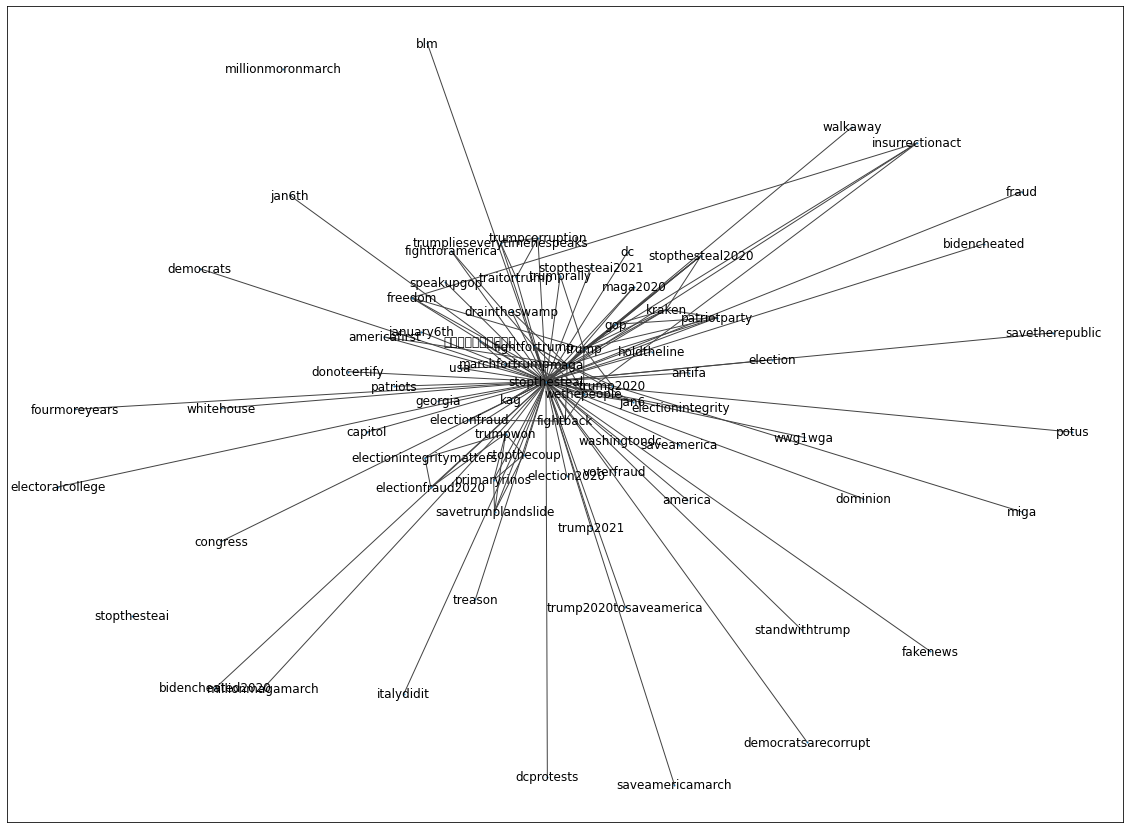

In [116]:
pos = nx.fruchterman_reingold_layout(hashG) #fruchterman_reingold 
plt.rcParams.update({'figure.figsize': (20, 15)})
nx.draw_networkx(
    hashG, 
    pos=pos, 
    node_size=1, 
    edge_color="#444444", 
    alpha=1, 
    with_labels=True)

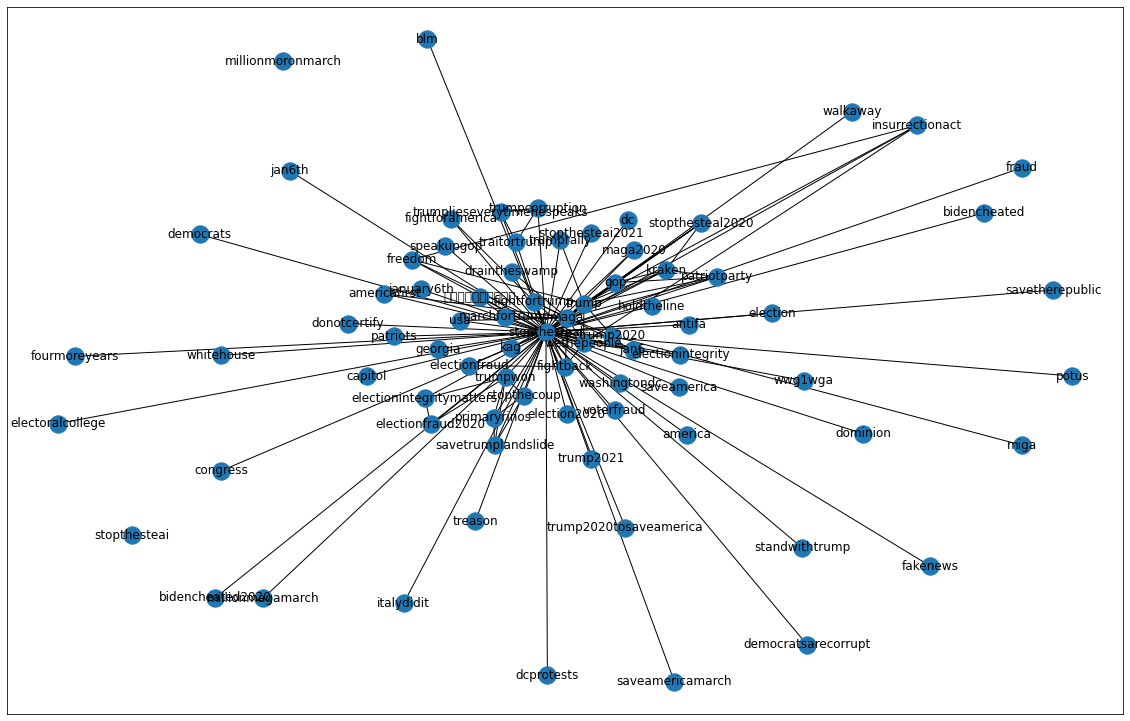

In [117]:
plt.figure(figsize = (20,13))
nx.draw_networkx(hashG, pos=pos)
plt.savefig("images/hash100.png", format = "png", dpi = 300)
plt.show()

In [118]:
# hashG=nx.path_graph('stopthesteal')
nx.write_gexf(hashG, "gexf/hash45.gexf")